In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd "/content/drive/My Drive/image caption"

/content/drive/My Drive/image caption


In [ ]:
#!wget 'https://storage.googleapis.com/kaggle-data-sets/13926%2F18767%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1591874850&Signature=GaR8jLf2ccv9fkRt4qsTYINj36vI1nwwOwfVJFJ%2FFhNrTuqK55Aa3FNXm6mwKKHfCqSZeB%2F40JNGZWhSRABx%2B8z0nTBaMTTHjYNqZfoXT05G9pm0u2tQTxuZzPrjwMAFvA5h6U4NqKmheApIGifE2iLm85iTuJ1vr1cZc2T4GC7Gxc4L76S9h6XHb4eRqkZrcnQR4YjamO0CHqTqMKLL0HdiDjuE76y4ANbMvO8N0%2FHq1GuODC3B9mHUrq9Kcu05tlmthHNjPHBai8iF2rqDm%2FGXnm3OdfMzr0kBn%2BFY%2BLG5iAyj5qD1TqLIgcJ69pTCjluaOrA6pXkMUuclqSRLfw%3D%3D'
#!unzip '13926%2F18767%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1591874850&Signature=GaR8jLf2ccv9fkRt4qsTYINj36vI1nwwOwfVJFJ%2FFhNrTuqK55Aa3FNXm6mwKKHfCqSZeB%2F40JNGZWhSRABx+8z0nTBaMTTHjY'

The name is too long, 486 chars total.
Trying to shorten...
New name is 13926%2F18767%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1591874850&Signature=GaR8jLf2ccv9fkRt4qsTYINj36vI1nwwOwfVJFJ%2FFhNrTuqK55Aa3FNXm6mwKKHfCqSZeB%2F40JNGZWhSRABx+8z0nTBaMTTHjY.
--2020-06-08 13:58:20--  https://storage.googleapis.com/kaggle-data-sets/13926%2F18767%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1591874850&Signature=GaR8jLf2ccv9fkRt4qsTYINj36vI1nwwOwfVJFJ%2FFhNrTuqK55Aa3FNXm6mwKKHfCqSZeB%2F40JNGZWhSRABx%2B8z0nTBaMTTHjYNqZfoXT05G9pm0u2tQTxuZzPrjwMAFvA5h6U4NqKmheApIGifE2iLm85iTuJ1vr1cZc2T4GC7Gxc4L76S9h6XHb4eRqkZrcnQR4YjamO0CHqTqMKLL0HdiDjuE76y4ANbMvO8N0%2FHq1GuODC3B9mHUrq9Kcu05tlmthHNjPHBai8iF2rqDm%2FGXnm3OdfMzr0kBn%2BFY%2BLG5iAyj5qD1TqLIgcJ69pTCjluaOrA6pXkMUuclqSRLfw%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 2a00:1450:4013:c00::80
Connecting to storag

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import sys
import json
import os
from PIL import Image
from sklearn.utils import shuffle
from tqdm import tqdm

In [ ]:
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import string
import os
from PIL import Image
import glob
import pickle
from time import time
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras import Input, layers
from keras import optimizers
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import load_model
from tensorflow.python.keras.backend import set_session

Using TensorFlow backend.


In [ ]:
# Download caption annotation files
annotation_folder = '/annotations/'
if not os.path.exists(os.path.abspath('.') + annotation_folder):
  annotation_zip = tf.keras.utils.get_file('captions.zip',
                                          cache_subdir=os.path.abspath('.'),
                                          origin = 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip',
                                          extract = True)
  annotation_file = os.path.dirname(annotation_zip)+'/annotations/captions_train2014.json'
  os.remove(annotation_zip)

# Download image files
image_folder = '/train2014/'
if not os.path.exists(os.path.abspath('.') + image_folder):
  image_zip = tf.keras.utils.get_file('train2014.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin = 'http://images.cocodataset.org/zips/train2014.zip',
                                      extract = True)
  PATH = os.path.dirname(image_zip) + image_folder
  os.remove(image_zip)
else:
  PATH = os.path.abspath('.') + image_folder

13510574080/13510573713 [==============================] - 427s 0us/step


In [ ]:
# Read the json file
annotation_file = 'annotations/captions_train2014.json'
with open(annotation_file, 'r') as f:
    annotations = json.load(f)

# Store captions and image names in vectors
all_captions = []
all_img_name_vector = []

for annot in annotations['annotations']:
    caption = annot['caption']
    image_id = annot['image_id']
    full_coco_image_path = 'COCO_train2014_' + '%012d.jpg' % (image_id)

    all_img_name_vector.append(full_coco_image_path)
    all_captions.append(caption)

# Shuffle captions and image_names together
# Set a random state
train_captions_1, img_name_vector_1 = shuffle(all_captions,
                                          all_img_name_vector,
                                          random_state=1)

# Select the first 30000 captions from the shuffled set
num_examples = 30000
train_captions = train_captions_1[:num_examples]
img_name_vector = img_name_vector_1[:num_examples]

In [ ]:
test_captions = train_captions_1[num_examples:35000]
test_img_name_vector = img_name_vector_1[num_examples:35000]

In [ ]:
len(train_captions), len(img_name_vector)

(30000, 30000)

In [ ]:
descriptions = dict()
for i in range(len(img_name_vector)):
  if img_name_vector[i] not in descriptions:
			descriptions[img_name_vector[i]] = list()
  descriptions[img_name_vector[i]].append(train_captions[i])

In [ ]:
list(descriptions.keys())[:5]

['COCO_train2014_000000324909.jpg',
 'COCO_train2014_000000511972.jpg',
 'COCO_train2014_000000508809.jpg',
 'COCO_train2014_000000270497.jpg',
 'COCO_train2014_000000008014.jpg']

In [ ]:
descriptions['COCO_train2014_000000511972.jpg']

['a person soaring through the air on skis']

In [ ]:
def clean_descriptions(descriptions):
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for key, desc_list in descriptions.items():
		for i in range(len(desc_list)):
			desc = desc_list[i]
			# tokenize
			desc = desc.split()
			# convert to lower case
			desc = [word.lower() for word in desc]
			# remove punctuation from each token
			desc = [w.translate(table) for w in desc]
			# remove hanging 's' and 'a'
			desc = [word for word in desc if len(word)>1]
			# remove tokens with numbers in them
			desc = [word for word in desc if word.isalpha()]
			# store as string
			desc_list[i] =  ' '.join(desc)

# clean descriptions
clean_descriptions(descriptions)

In [ ]:
descriptions['COCO_train2014_000000324909.jpg']

['skateboarder performing trick on skateboard ramp']

In [ ]:
def to_vocabulary(descriptions):
	# build a list of all description strings
	all_desc = set()
	for key in descriptions.keys():
		[all_desc.update(d.split()) for d in descriptions[key]]
	return all_desc

# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Original Vocabulary Size: %d' % len(vocabulary))

Original Vocabulary Size: 8166


In [ ]:
def save_descriptions(descriptions, filename):
	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

save_descriptions(descriptions, 'descriptions.txt')

In [ ]:
images = 'train2014/'
# Create a list of all image names in the directory
img = glob.glob(images + '*.jpg')

In [ ]:
img

['train2014/COCO_train2014_000000270070.jpg',
 'train2014/COCO_train2014_000000101772.jpg',
 'train2014/COCO_train2014_000000359320.jpg',
 'train2014/COCO_train2014_000000486482.jpg',
 'train2014/COCO_train2014_000000116155.jpg',
 'train2014/COCO_train2014_000000082143.jpg',
 'train2014/COCO_train2014_000000242307.jpg',
 'train2014/COCO_train2014_000000510484.jpg',
 'train2014/COCO_train2014_000000339597.jpg',
 'train2014/COCO_train2014_000000366396.jpg',
 'train2014/COCO_train2014_000000363942.jpg',
 'train2014/COCO_train2014_000000244928.jpg',
 'train2014/COCO_train2014_000000239417.jpg',
 'train2014/COCO_train2014_000000045059.jpg',
 'train2014/COCO_train2014_000000556018.jpg',
 'train2014/COCO_train2014_000000328391.jpg',
 'train2014/COCO_train2014_000000441327.jpg',
 'train2014/COCO_train2014_000000544001.jpg',
 'train2014/COCO_train2014_000000514930.jpg',
 'train2014/COCO_train2014_000000036618.jpg',
 'train2014/COCO_train2014_000000452782.jpg',
 'train2014/COCO_train2014_0000000

In [ ]:
with open('img_files.txt', 'w') as f:
    for item in img:
        f.write("%s\n" % item)

In [ ]:
images = 'train2014/'
with open('img_files.txt') as f: 
  img = f.read().splitlines()

In [ ]:
train_img = []
if 'COCO_train2014_000000324909.jpg' in img_name_vector:
  print('innn')
for i in img:
  if i[len(images):] in img_name_vector:
    train_img.append(i)

innn


In [ ]:
train_img

['train2014/COCO_train2014_000000529238.jpg',
 'train2014/COCO_train2014_000000229302.jpg',
 'train2014/COCO_train2014_000000520655.jpg',
 'train2014/COCO_train2014_000000358465.jpg',
 'train2014/COCO_train2014_000000195712.jpg',
 'train2014/COCO_train2014_000000029287.jpg',
 'train2014/COCO_train2014_000000163302.jpg',
 'train2014/COCO_train2014_000000526887.jpg',
 'train2014/COCO_train2014_000000552585.jpg',
 'train2014/COCO_train2014_000000580382.jpg',
 'train2014/COCO_train2014_000000190241.jpg',
 'train2014/COCO_train2014_000000062292.jpg',
 'train2014/COCO_train2014_000000251509.jpg',
 'train2014/COCO_train2014_000000473985.jpg',
 'train2014/COCO_train2014_000000198788.jpg',
 'train2014/COCO_train2014_000000347590.jpg',
 'train2014/COCO_train2014_000000317557.jpg',
 'train2014/COCO_train2014_000000558567.jpg',
 'train2014/COCO_train2014_000000155864.jpg',
 'train2014/COCO_train2014_000000007584.jpg',
 'train2014/COCO_train2014_000000278675.jpg',
 'train2014/COCO_train2014_0000002

In [ ]:
test_img = []
for i in img:
  if i[len(images):] in test_img_name_vector:
    test_img.append(i)

In [ ]:
test_img

['train2014/COCO_train2014_000000523669.jpg',
 'train2014/COCO_train2014_000000015156.jpg',
 'train2014/COCO_train2014_000000211963.jpg',
 'train2014/COCO_train2014_000000007584.jpg',
 'train2014/COCO_train2014_000000509698.jpg',
 'train2014/COCO_train2014_000000305247.jpg',
 'train2014/COCO_train2014_000000372165.jpg',
 'train2014/COCO_train2014_000000458864.jpg',
 'train2014/COCO_train2014_000000323213.jpg',
 'train2014/COCO_train2014_000000469587.jpg',
 'train2014/COCO_train2014_000000159021.jpg',
 'train2014/COCO_train2014_000000002347.jpg',
 'train2014/COCO_train2014_000000410229.jpg',
 'train2014/COCO_train2014_000000107584.jpg',
 'train2014/COCO_train2014_000000248141.jpg',
 'train2014/COCO_train2014_000000443909.jpg',
 'train2014/COCO_train2014_000000444941.jpg',
 'train2014/COCO_train2014_000000578808.jpg',
 'train2014/COCO_train2014_000000152458.jpg',
 'train2014/COCO_train2014_000000207992.jpg',
 'train2014/COCO_train2014_000000285897.jpg',
 'train2014/COCO_train2014_0000000

In [ ]:
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [ ]:
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', img_name_vector)
print('Descriptions: train=%d' % len(train_descriptions))

Descriptions: train=25950


In [ ]:
def preprocess(image_path):
    # Convert all the images to size 299x299 as expected by the inception v3 model
    img = image.load_img(image_path, target_size=(299, 299))
    # Convert PIL image to numpy array of 3-dimensions
    x = image.img_to_array(img)
    # Add one more dimension
    x = np.expand_dims(x, axis=0)
    # preprocess the images using preprocess_input() from inception module
    x = preprocess_input(x)
    return x

In [ ]:
model = InceptionV3(weights='imagenet')

96116736/96112376 [==============================] - 3s 0us/step


In [ ]:
model_new = Model(model.input, model.layers[-2].output)

In [ ]:
def encode(image):
    image = preprocess(image) # preprocess the image
    fea_vec = model_new.predict(image) # Get the encoding vector for the image
    fea_vec = np.reshape(fea_vec, fea_vec.shape[1]) # reshape from (1, 2048) to (2048, )
    return fea_vec

In [ ]:
start = time()
encoding_train = {}
for img in tqdm(train_img):
    encoding_train[img[len(images):]] = encode(img)
print("Time taken in seconds =", time()-start)

100%|██████████| 25950/25950 [17:15<00:00, 25.05it/s]

Time taken in seconds = 1035.8932914733887


In [ ]:
train_img[0]

'train2014/COCO_train2014_000000339597.jpg'

In [ ]:
encoding_train

{'COCO_train2014_000000339597.jpg': array([1.2172883 , 0.29042628, 0.21434009, ..., 0.76495415, 1.4309535 ,
        0.25331387], dtype=float32),
 'COCO_train2014_000000366396.jpg': array([0.22576627, 0.09879607, 0.11214656, ..., 0.12141366, 0.1522671 ,
        0.41051376], dtype=float32),
 'COCO_train2014_000000556018.jpg': array([0.2469121 , 0.60578424, 0.22632036, ..., 0.1337828 , 0.00281339,
        0.28935057], dtype=float32),
 'COCO_train2014_000000441327.jpg': array([0.05264303, 0.06450009, 0.21119386, ..., 0.08693747, 0.08459373,
        0.16667205], dtype=float32),
 'COCO_train2014_000000036618.jpg': array([0.26589423, 0.44191638, 0.7509664 , ..., 0.43058178, 0.9627292 ,
        0.14980622], dtype=float32),
 'COCO_train2014_000000452782.jpg': array([0.60114616, 0.33101255, 0.35656267, ..., 0.02607464, 0.62549716,
        0.98283863], dtype=float32),
 'COCO_train2014_000000093424.jpg': array([0.4342625 , 0.10909784, 0.41016594, ..., 1.1221646 , 0.41496387,
        0.222827  ], d

In [ ]:
with open("encoded_train_images.pkl", "wb") as encoded_pickle:
    pickle.dump(encoding_train, encoded_pickle)

In [ ]:
start = time()
encoding_test = {}
for img in tqdm(test_img):
    encoding_test[img[len(images):]] = encode(img)
print("Time taken in seconds =", time()-start)

100%|██████████| 4870/4870 [41:53<00:00,  1.94it/s]

Time taken in seconds = 2513.4382984638214


In [ ]:
with open("encoded_test_images.pkl", "wb") as encoded_pickle:
    pickle.dump(encoding_test, encoded_pickle)

NameError: ignored

In [ ]:
train_features = pickle.load(open("encoded_train_images.pkl", "rb"))
print('Photos: train=%d' % len(train_features))

Photos: train=25950


In [ ]:
if os.path.getsize("encoded_test_images.pkl") > 0: 
  with open("encoded_test_images.pkl", "rb") as f:
    unpickler = pickle.Unpickler(f)
    test_features = unpickler.load()
  print('Photos: train=%d' % len(test_features))

In [ ]:
all_train_captions = []
for key, val in train_descriptions.items():
    for cap in val:
        all_train_captions.append(cap)
len(all_train_captions)

30000

In [ ]:
word_count_threshold = 10
word_counts = {}
nsents = 0
for sent in all_train_captions:
    nsents += 1
    for w in sent.split(' '):
        word_counts[w] = word_counts.get(w, 0) + 1

vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]
print('preprocessed words %d -> %d' % (len(word_counts), len(vocab)))

preprocessed words 8168 -> 1706


In [ ]:
ixtoword = {}
wordtoix = {}

ix = 1
for w in vocab:
    wordtoix[w] = ix
    ixtoword[ix] = w
    ix += 1

In [ ]:
with open('wordtoix.p', 'wb') as fp:
    pickle.dump(wordtoix, fp, protocol=pickle.HIGHEST_PROTOCOL)

with open('ixtoword.p', 'wb') as fp:
    pickle.dump(ixtoword  , fp, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
vocab_size = len(ixtoword) + 1 # one for appended 0's
vocab_size

1707

In [ ]:
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

Description Length: 43


In [ ]:
def data_generator(descriptions, photos, wordtoix, max_length, num_photos_per_batch):
    X1, X2, y = list(), list(), list()
    n=0
    # loop for ever over images
    while 1:
        for key, desc_list in descriptions.items():
            n+=1
            # retrieve the photo feature
            photo = photos[key]
            for desc in desc_list:
                # encode the sequence
                seq = [wordtoix[word] for word in desc.split(' ') if word in wordtoix]
                # split one sequence into multiple X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pair
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    # store
                    X1.append(photo)
                    X2.append(in_seq)
                    y.append(out_seq)
            # yield the batch data
            if n==num_photos_per_batch:
                yield [[array(X1), array(X2)], array(y)]
                X1, X2, y = list(), list(), list()
                n=0

In [ ]:
glove_dir = ''
embeddings_index = {} # empty dictionary
f = open(os.path.join(glove_dir, 'glove.6B.200d.txt'), encoding="utf-8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_dim = 200

# Get 200-dim dense vector for each of the 10000 words in out vocabulary
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in wordtoix.items():
    #if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in the embedding index will be all zeros
        embedding_matrix[i] = embedding_vector

In [ ]:
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
model = Model(inputs=[inputs1, inputs2], outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 43)           0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 43, 200)      341400      input_2[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2048)         0           input_1[0][0]                    
____________________________________________________________________________________________

In [ ]:
model.layers[2]

NameError: ignored

In [ ]:
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
epochs = 5
number_pics_per_bath = 3
steps = len(train_descriptions)//number_pics_per_bath

In [ ]:
model = load_model('model_9.h5')

In [ ]:
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, wordtoix, max_length, number_pics_per_bath)
    model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    model.save('model2_' + str(i) + '.h5')

NameError: ignored

In [ ]:
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, wordtoix, max_length, number_pics_per_bath)
    model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    model.save('model_' + str(i) + '.h5')
    print(i)

In [ ]:
model.optimizer.learning_rate = 0.0001
epochs = 10
number_pics_per_bath = 6
steps = len(train_descriptions)//number_pics_per_bath

In [ ]:
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, wordtoix, max_length, number_pics_per_bath)
    model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    #model.save('./model_weights/model_' + str(i) + '.h5')

Epoch 1/1


FailedPreconditionError: ignored

In [ ]:
with open("encoded_test_images.pkl", "rb") as encoded_pickle:
    encoding_test = pickle.load(encoded_pickle)

In [ ]:
encoding_test.keys()

dict_keys(['COCO_train2014_000000355947.jpg', 'COCO_train2014_000000522191.jpg', 'COCO_train2014_000000156763.jpg', 'COCO_train2014_000000152090.jpg', 'COCO_train2014_000000054943.jpg', 'COCO_train2014_000000154752.jpg', 'COCO_train2014_000000375739.jpg', 'COCO_train2014_000000499731.jpg', 'COCO_train2014_000000044996.jpg', 'COCO_train2014_000000015374.jpg', 'COCO_train2014_000000132908.jpg', 'COCO_train2014_000000436744.jpg', 'COCO_train2014_000000209275.jpg', 'COCO_train2014_000000224894.jpg', 'COCO_train2014_000000081009.jpg', 'COCO_train2014_000000192796.jpg', 'COCO_train2014_000000143478.jpg', 'COCO_train2014_000000196331.jpg', 'COCO_train2014_000000167045.jpg', 'COCO_train2014_000000318223.jpg', 'COCO_train2014_000000464810.jpg', 'COCO_train2014_000000085798.jpg', 'COCO_train2014_000000384412.jpg', 'COCO_train2014_000000355789.jpg', 'COCO_train2014_000000347189.jpg', 'COCO_train2014_000000126810.jpg', 'COCO_train2014_000000405662.jpg', 'COCO_train2014_000000091576.jpg', 'COCO_tra

In [ ]:
encoding_test['COCO_train2014_000000355947.jpg'].shape

(2048,)

In [ ]:
def greedySearch(photo):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_length)
        photo = np.array(photo)
        sequence = np.array(sequence)
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

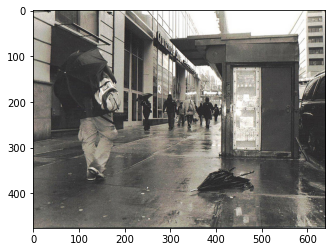

Greedy: man is standing on the street with an umbrella


In [ ]:
pic = list(encoding_test.keys())[5]
image = encoding_test[pic].reshape((1,2048))
x=plt.imread(images+pic)
plt.imshow(x)
plt.show()
print("Greedy:",greedySearch(image))

In [ ]:
image.shape

(1, 2048)

In [ ]:
image

array([[0.12706092, 0.19422197, 0.26776925, ..., 0.3895588 , 0.43578455,
        0.36830688]], dtype=float32)